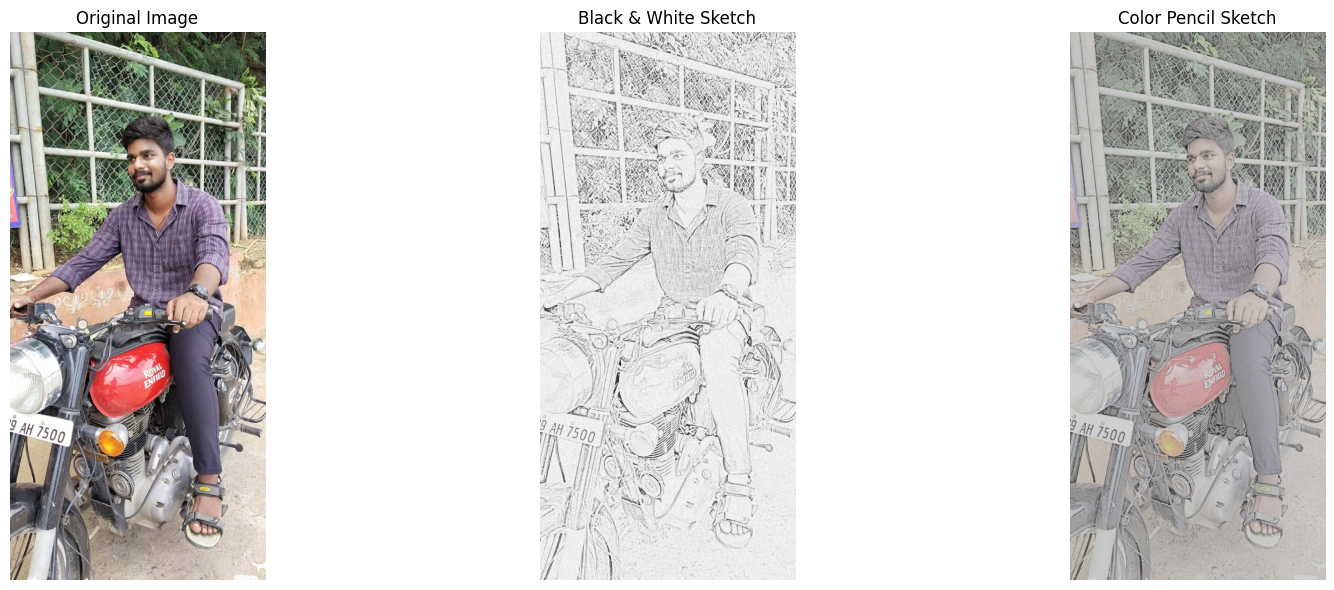

Sketches saved successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_pencil_sketches(image_path, darkness=0.6, smoothness=17, contrast=1.2):
    """Generate both B&W and color pencil sketches"""
    # Read and validate image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert and blur for sketch effect
    inverted = 255 - gray
    blurred = cv2.GaussianBlur(inverted, (smoothness, smoothness), 0)

    # Create base sketch
    sketch = cv2.divide(gray, 255 - blurred, scale=256)
    sketch = np.clip(sketch * darkness, 0, 255).astype(np.uint8)

    # Enhance contrast
    sketch = cv2.convertScaleAbs(sketch, alpha=contrast, beta=0)

    # Add paper texture
    texture = np.random.normal(loc=200, scale=30, size=sketch.shape).clip(0, 255).astype(np.uint8)
    bw_sketch = cv2.addWeighted(sketch, 0.8, texture, 0.2, 0)

    # Create color sketch
    color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    color_sketch = cv2.addWeighted(color, 0.3, cv2.cvtColor(bw_sketch, cv2.COLOR_GRAY2RGB), 0.7, 0)

    return bw_sketch, color_sketch

# ====== YOUR IMAGE PATH ======
image_path = r'/content/madhan.jpg'

try:
    # Generate both sketch versions
    bw_sketch, color_sketch = generate_pencil_sketches(
        image_path,
        darkness=0.6,    # Control darkness (0.1-1.0)
        smoothness=17,   # Line smoothness (odd numbers)
        contrast=1.2     # Contrast boost
    )

    # Load original for comparison
    original = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Display results
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(bw_sketch, cmap='gray')
    plt.title("Black & White Sketch")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(color_sketch)
    plt.title("Color Pencil Sketch")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Save outputs
    cv2.imwrite(image_path.replace('.jpg', '_bw_sketch.jpg'), bw_sketch)
    cv2.imwrite(image_path.replace('.jpg', '_color_sketch.jpg'), cv2.cvtColor(color_sketch, cv2.COLOR_RGB2BGR))
    print("Sketches saved successfully!")

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nTroubleshooting:")
    print("1. Check image path exists")
    print("2. Install required packages: pip install opencv-python matplotlib numpy")
    print("3. Try reducing darkness parameter if output is too dark")